In [1]:
# Import methods

%run Methods.ipynb

,Samples
0,LMOSTD_1
1,LMOSTD_2
2,Pt10LMO_1
3,Pt10LMO_2
4,PtITOLMO_1
5,PtITOLMO_2
6,Pt_1
7,Pt_2
8,Pt_3
9,TiN_1


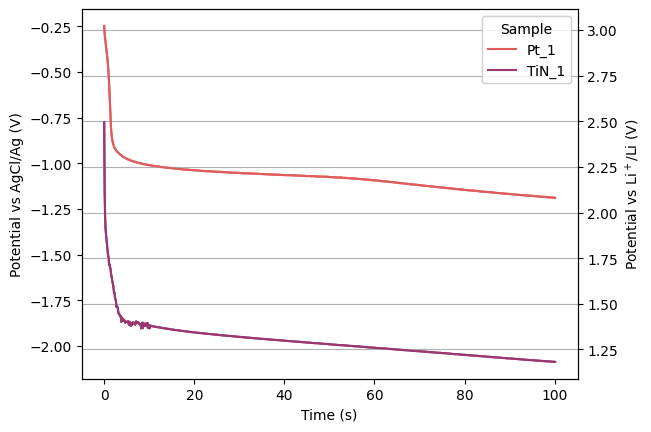

In [6]:
### Deposition NanoSCE FEB

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24Feb_NanoSCE\19FEB'
df, samples = sce_dep(path)
sample_list = [6, 9]
dep_plot(df, sample_list, True, 100)
# dep_plot(df, sample_list, True, 100)
samples

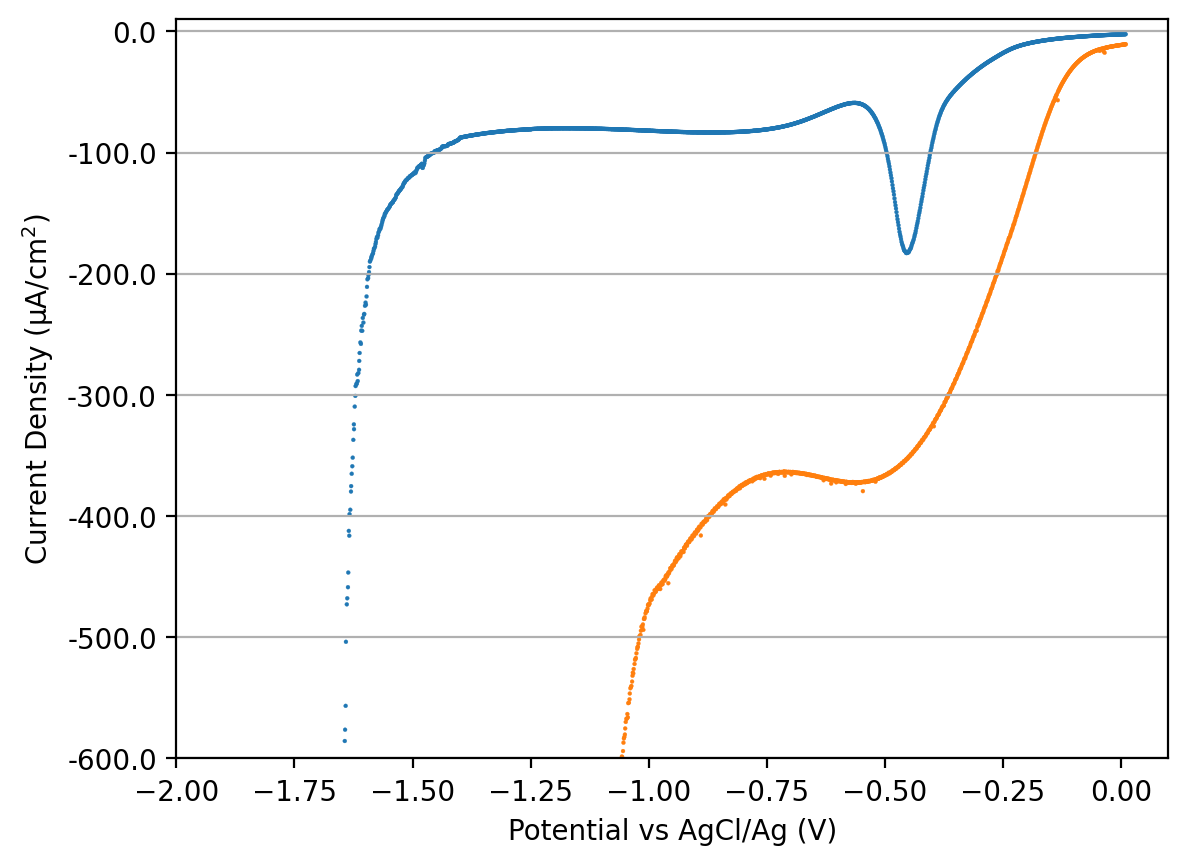

In [3]:
## LMO on water

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24Feb_NanoSCE\27FEB\CV'
a = np.pi * (0.75 **2)
# lmo_water = cv_water(path, a, 100)
lsv_water(path, a, 200, False) #, area, 200)
plt.ylim(-0.0006, 0.00001)
plt.grid()

In [4]:

lmo_w_1 = lmo_water[lmo_water['Sample'] == 'LMO_2_CV_1']
lmo_w_2 = lmo_water[lmo_water['Sample'] == 'LMO_2_CV_2']
lmo_w_3 = lmo_water[lmo_water['Sample'] == 'LMO_2_CV_3']
# fig, ax = plt.subplots(dpi = 100)
# sns.scatterplot(data = lmo_w_1, x = col_cv[0], y = strings[0], hue = 'Scan', edgecolor = None, s =2)
# 
# lmo_w_1

NameError: name 'lmo_water' is not defined

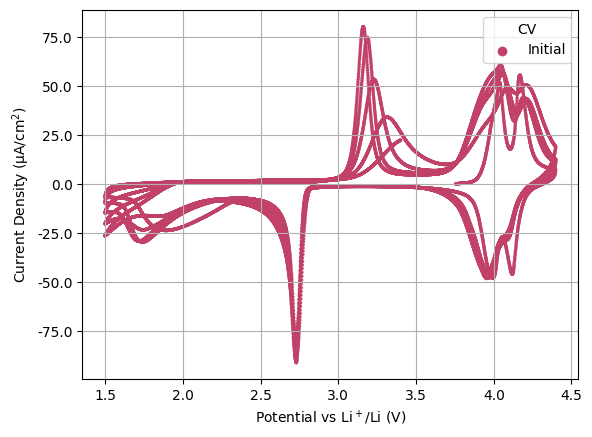

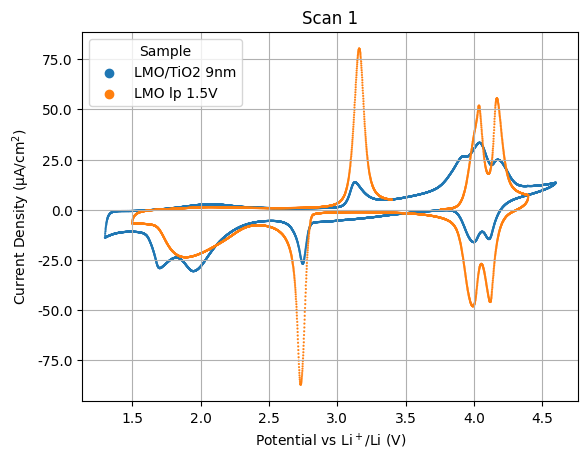

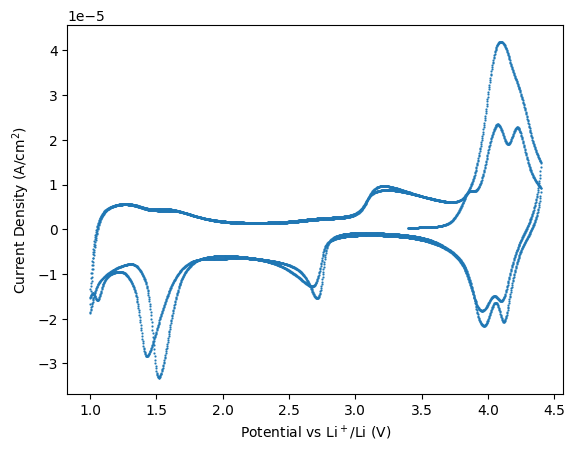

In [ ]:
### Import data from LMO_TiO2
%run LMO_TiO2.ipynb
%run 24LSB02.ipynb

Text(0, 0.5, 'Current Density (µA/cm$^2$)')

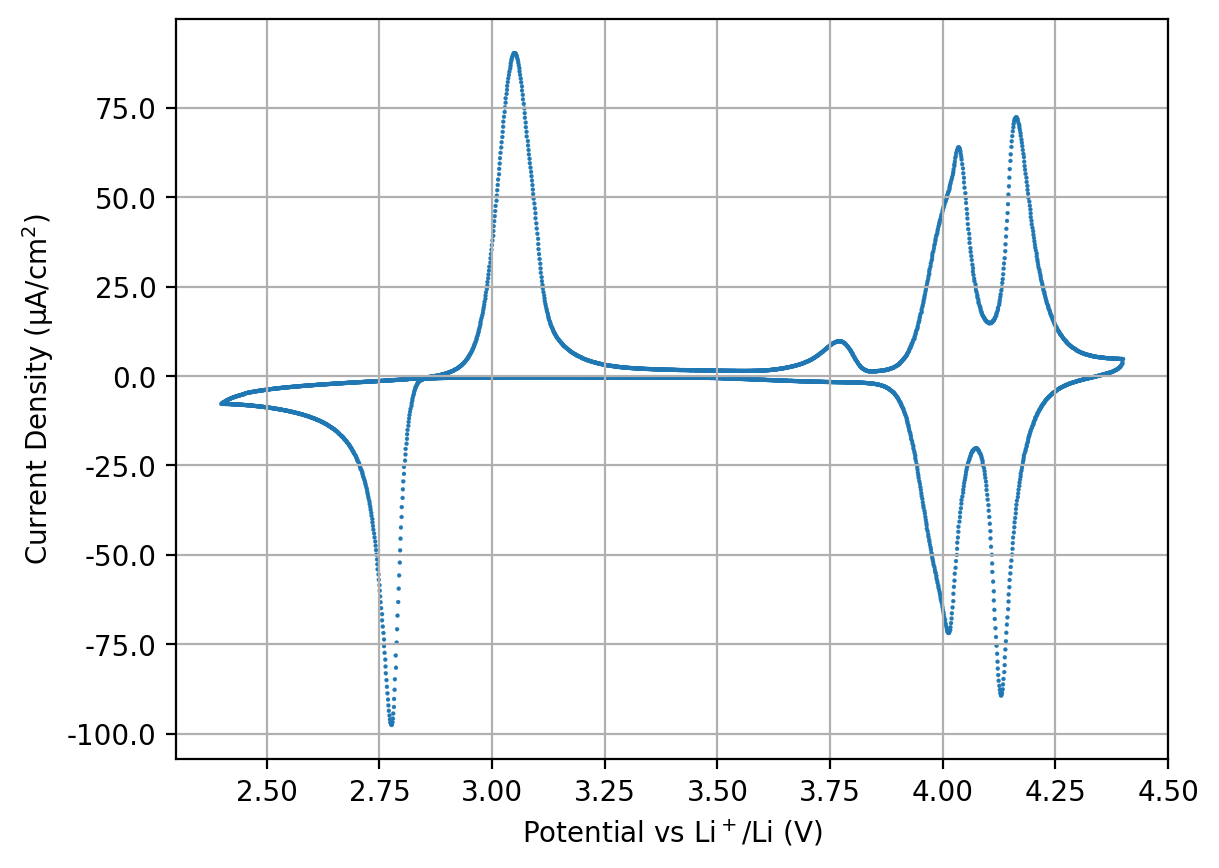

In [ ]:
pt1_ = pt1[0][pt1[0]['Scan'] != 1] # 10mV/s
pt2_ = pt2[0][pt2[0]['Scan'] == 1] # 5mV/s
pt3_ = pt3[0][pt3[0]['Scan'] == 3] # 10 mV/s

pt_tio2_1_ = pt_tio2_1[0][pt_tio2_1[0]['Scan'] != 3]
pt_tio2_2_ = pt_tio2_2[0][pt_tio2_2[0]['Scan'] == 1]

lmo_tio2_9_ = lmo_tio2_9[lmo_tio2_9['Scan'] == 2]
tio2 = tio2_cv_[tio2_cv_['Scan'] == 1]

lmo_w__ = lmo_w_1[lmo_w_1['Scan'] == 1]

comparison = pd.concat([old])

fig, ax = plt.subplots(dpi = 200)
# sns.scatterplot(data = lmo_w__, x = col_cv[0], y = strings[0], edgecolor = None, s =2, color = 'tab:green', label = 'LMO in water') #, marker_size = 10)
sns.scatterplot(data = comparison, x = col_cv[0], y = strings[0], hue = 'Sample', edgecolor = None, s = 2, legend = False)
plt.grid()
ax.yaxis.set_major_formatter(formatter_1e6)
ax.set_ylabel(strings[1])


In [ ]:
# #### #Pt10nm LMO CV and GC

# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB02\Pt10_01'
# setup_files(path)
# area = np.pi * 0.5 **2
# thickness = 90
# sample = 'Pt10nm LMO 1C'
# pt10nm = cc(path, area, thickness, sample)

In [ ]:
# #### PLOT Pt10nm LMO

# 
# cv_plot(pt10nm, color_map, 100)
# # plt.grid()
# cc_plot(pt10nm, color_map, 100)
# plt.grid()
# dq_dv_plot(pt10nm, color_map, 100)
# plt.ylim(0, 600)